## Observations and Insights 

Three Observable Trends:
1. Observing the line plot created to observe mouse l509, we can make take from that data that the regimen given (Capomulin) first made the mouses tumor grow and peaked at timepoint 20 but after that it decreased sharply and reached it's lowest between the 30 and 40 timepoint.
2. When dissecting the linear regression and Pearson's Correlation Coefficient that was calculated on the scatter plot comparing the weight of the mice to the average size of the tumor.  We can take away that there is a very strong correlation; Pearson's score of 0.84, between the weight of the mouse and the average size of the tumor.  With confidence, I would say that the more the mouse weighs the larger average size tumor the mouse would have.
3. Looking at the mean of each regimen in the data set, each of the regimen means fall less than 3 points of each other with the exception of Ramicane and Capomulin which have a Tumor Volume difference of over 12 points.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
merge_df["Mouse ID"].describe()

count     1893
unique     249
top       g989
freq        13
Name: Mouse ID, dtype: object

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_merge=merge_df.loc[merge_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merge_df=merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_merge_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_data_df = clean_merge_df.groupby(["Drug Regimen"])

#Mean of tumor size for each regimen
avg_tumor_size=grouped_data_df["Tumor Volume (mm3)"].mean()
#mean_tumor = np.mean(clean_merge_df)["Tumor Volume (mm3)"]
#Median of tumor size for each regimen
med_tumor_size=grouped_data_df["Tumor Volume (mm3)"].apply(np.median)
#Variance of tumor size for each regimen
var_tumor_size=grouped_data_df["Tumor Volume (mm3)"].var()
#Standard Deviation of tumor size for each regimen
std_tumor_size=grouped_data_df["Tumor Volume (mm3)"].std()
#SEM of tumor size for reach regimen
sem_tumor_size=grouped_data_df["Tumor Volume (mm3)"].sem()

sum_stats=pd.DataFrame({"Mean of Tumor Volume":avg_tumor_size,
                       "Median of Tumor Volume": med_tumor_size,
                       "Variance of Tumor Volume":var_tumor_size,
                       "Standard Deviation of Tumor Volume":std_tumor_size,
                       "SEM of Tumor Volume":sem_tumor_size})
sum_stats=sum_stats[["Mean of Tumor Volume", "Median of Tumor Volume", "Variance of Tumor Volume", 
            "Standard Deviation of Tumor Volume","SEM of Tumor Volume"]]
sum_stats

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
grouped_data_df = clean_merge_df.groupby(["Drug Regimen"])
agg_summary=grouped_data_df.agg({"Tumor Volume (mm3)" : ['mean','median', 'var', 'std', 'sem']})
agg_summary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
mice=clean_merge_df["Drug Regimen"].value_counts()
drug=clean_merge_df["Drug Regimen"].unique()
print(mice)
print(drug)

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64
['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


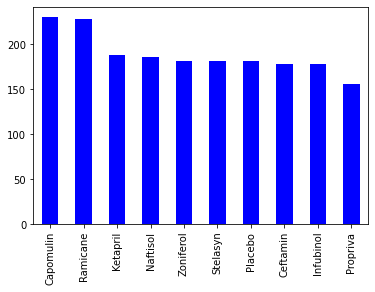

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mice.plot(kind="bar",color="blue")

<function matplotlib.pyplot.show(*args, **kw)>

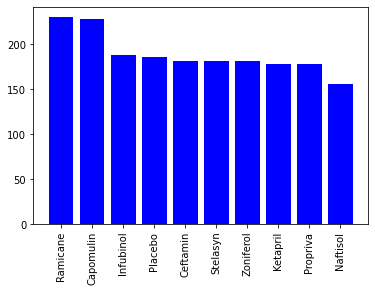

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, mice, color='blue', align="center")
plt.xticks(tick_locations, drug, rotation="vertical")
plt.show


Text(0.5, 1.0, 'Male Mice vs. Female Mice')

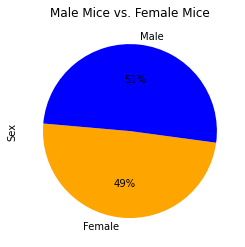

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender=clean_merge_df.groupby(["Sex"])
gender_count=gender["Sex"].count()
gender_count

gender_count.plot(kind='pie', y="Mouse ID",autopct="%1.0f%%",  startangle=175, colors= ["orange", "blue"])
plt.title("Male Mice vs. Female Mice")

Text(0, 0.5, 'Sex')

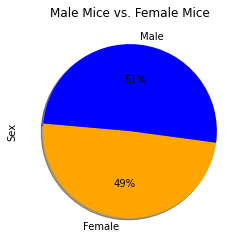

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female", "Male"]
colors=["orange", "blue"]
plt.pie(gender_count, labels=labels, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle=175)
plt.title("Male Mice vs. Female Mice")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_merge_df.groupby("Mouse ID").max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge=max_tumor[["Mouse ID", "Timepoint"]].merge(clean_merge_df, on=["Mouse ID", "Timepoint"], how= "left")

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drugs=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = merge[merge["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    iqr = tumor_data.quantile(.75) - tumor_data.quantile(.25)
    lower_bound = tumor_data.quantile(.25)  - (1.5*iqr)
    upper_bound = tumor_data.quantile(.75) + (1.5*iqr)
    
    # add subset 
    list.append(tumor_data)
    
    # Determine outliers using upper and lower bounds
    print(f"{drug} potential outliers: {tumor_data[tumor_data<lower_bound], (tumor_data>upper_bound)}")

Capomulin potential outliers: (Series([], Name: Tumor Volume (mm3), dtype: float64), 19     False
24     False
61     False
64     False
66     False
81     False
84     False
86     False
88     False
109    False
116    False
122    False
125    False
163    False
164    False
170    False
175    False
181    False
184    False
193    False
205    False
209    False
221    False
227    False
240    False
Name: Tumor Volume (mm3), dtype: bool)
Ramicane potential outliers: (Series([], Name: Tumor Volume (mm3), dtype: float64), 6      False
7      False
10     False
12     False
33     False
37     False
45     False
52     False
70     False
77     False
78     False
92     False
94     False
97     False
120    False
127    False
158    False
159    False
167    False
169    False
178    False
191    False
218    False
236    False
245    False
Name: Tumor Volume (mm3), dtype: bool)
Infubinol potential outliers: (31    36.321346
Name: Tumor Volume (mm3), dtype: float64, 0      False
1

Text(0.5, 0, 'Regimens')

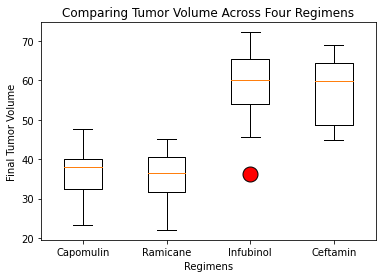

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(list, labels=drugs, flierprops={"markerfacecolor":"red", "markersize":15})
plt.ylabel("Final Tumor Volume")
plt.title("Comparing Tumor Volume Across Four Regimens")
plt.xlabel("Regimens")

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

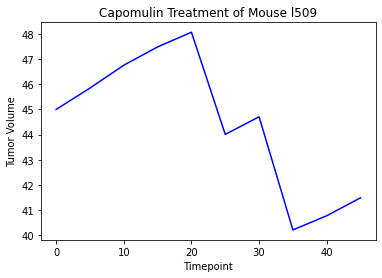

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_merge_df.loc[clean_merge_df["Drug Regimen"] == "Capomulin"]
mouse=capomulin.loc[capomulin["Mouse ID"]=="l509"]
# tumor_vol=clean_merge_df.groupby(["Tumor Volume (mm3)"])
# time=clean_merge_df.groupby(["Timepoint"])
tumor_volume=mouse["Tumor Volume (mm3)"]
timepoint=mouse["Timepoint"]
plt.plot(timepoint, tumor_volume, color="blue")
plt.show
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

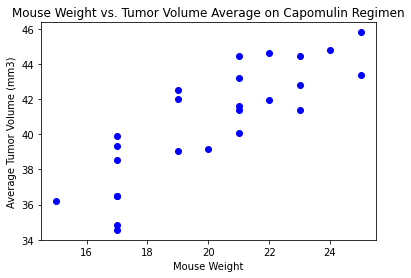

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_volume=capomulin.groupby("Mouse ID").mean()
weight=avg_volume["Weight (g)"]
tumor=avg_volume["Tumor Volume (mm3)"]
plt.scatter(weight, tumor, color="blue")
plt.title("Mouse Weight vs. Tumor Volume Average on Capomulin Regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

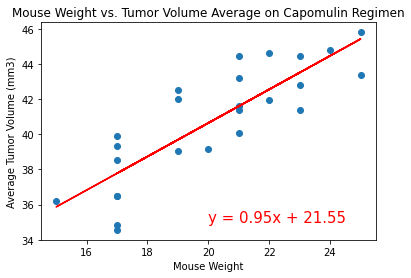

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight=avg_volume["Weight (g)"]
tumor=avg_volume["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tumor)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.title("Mouse Weight vs. Tumor Volume Average on Capomulin Regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")